<a href="https://colab.research.google.com/github/Shahin2512/Machine-Learning/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#Checking is there any missing values in dataset
df.isna().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
x = df.iloc[:,[3,4]].values


In [ ]:
#determining optimal number of clusters
# WCSS = Within cluster sum of squares (elbow method)
wcss = []

for i in range (1,11):

  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)
  # computes the squared distance of each sample in a cluster to its cluster center and sums them up.
  wcss.append(kmeans.inertia_)

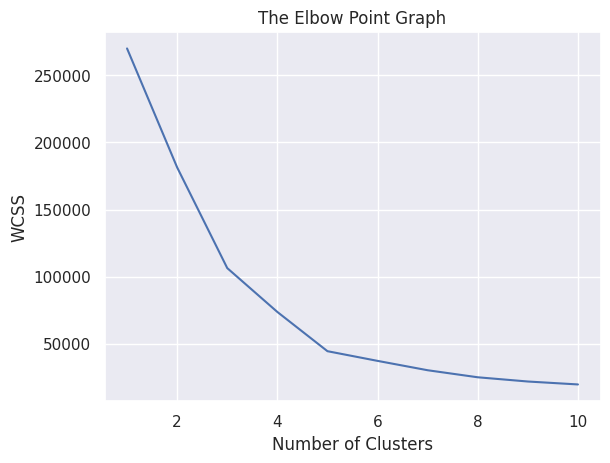

In [ ]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum number of Clusters = 5

In [ ]:
kmeans = KMeans(n_clusters=5 , init='k-means++', random_state=0)

y = kmeans.fit_predict(x)
print(y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


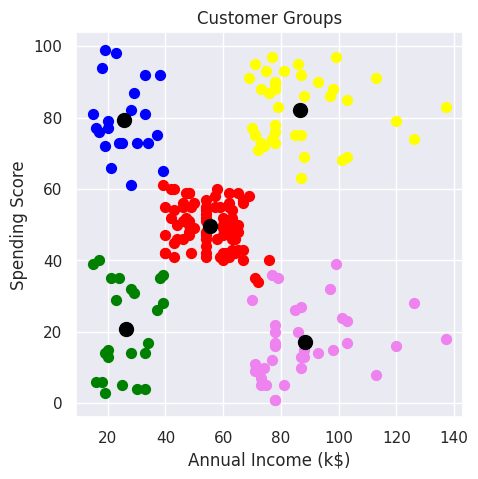

In [ ]:
# Plotting all the Clusters

plt.figure(figsize = (5,5))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='violet', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='blue', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='green', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroid')
plt.title('Customer Groups')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()